<a href="https://colab.research.google.com/github/shravyagulaigari/Python-2/blob/main/Python_Day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import re

ps=pd.read_csv('/content/gdrive/My Drive/CRT_PYTHON_22BK1A7248/Shopping_data.csv')

Accuracy: 85.00%

Confusion Matrix:
 [[10  3  0]
 [ 3 17  1]
 [ 2  0 24]]

Classification Report:
               precision    recall  f1-score   support

        High       0.67      0.77      0.71        13
         Low       0.85      0.81      0.83        21
      Medium       0.96      0.92      0.94        26

    accuracy                           0.85        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.86      0.85      0.85        60



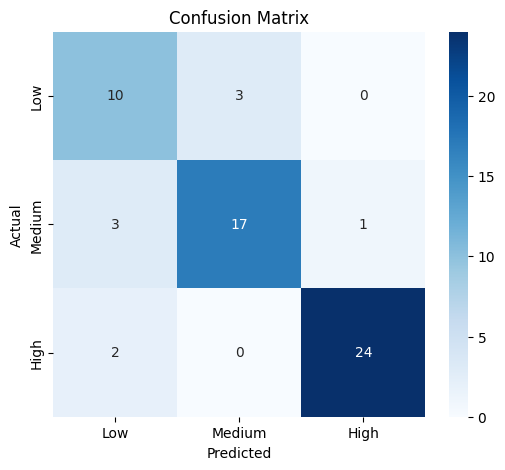

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
data = ps.copy()

# Convert Spending Score to 3 categories: Low, Medium, High
data['Spending_Category'] = pd.cut(data['Spending Score (1-100)'],
                                   bins=[0, 40, 70, 100],
                                   labels=['Low', 'Medium', 'High'])

# Use multiple features if available, else only Annual Income
features = ['Annual Income (k$)']
if 'Age' in data.columns:
    features.append('Age')
if 'Gender' in data.columns:
    # Convert Gender to numeric: Male=0, Female=1
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    features.append('Gender')

X = data[features]
y = data['Spending_Category']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest with tuned hyperparameters
model = RandomForestClassifier(n_estimators=300,
                               max_depth=10,
                               min_samples_split=5,
                               min_samples_leaf=2,
                               random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy & metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
